In [1]:
import numpy as np
import pandas as pd

In [2]:
DATA_LOAD_PATH = '../datasets/raw/black_friday/BlackFriday.csv'
DATA_WRITE_PATH = '../datasets/preprocessed/pre_black_friday.csv'

In [3]:
dataset = pd.read_csv(DATA_LOAD_PATH)

In [4]:
summed_purchases = dataset[['User_ID', 'Purchase']].groupby(by='User_ID').sum()
dataset = pd.merge(summed_purchases, dataset, on=['User_ID', 'User_ID'])

In [5]:
dataset.head()

,User_ID,Purchase_x,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_y
0,1000001,333481,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,333481,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,333481,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,333481,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000001,333481,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842


In [6]:
dataset.describe()

,User_ID,Purchase_x,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_y
count,5.375770e+05,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,1.911849e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,1.483774e+06,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,4.410800e+04,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,7.831780e+05,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,1.562615e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,2.668388e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,1.053678e+07,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
to_drop = ['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase_y']
dataset = dataset.drop(to_drop, axis=1)

In [8]:
dataset.shape

(537577, 8)

In [9]:
dataset = dataset.drop_duplicates()

In [10]:
dataset.shape

(5891, 8)

In [11]:
to_drop = ['User_ID']
dataset = dataset.drop(to_drop, axis=1)

In [12]:
dataset = pd.get_dummies(dataset)

In [13]:
dataset.head()

,Purchase_x,Occupation,Marital_Status,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,333481,10,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34,810353,16,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
110,341635,15,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
139,205987,7,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
152,821001,20,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [14]:
dataset = dataset.drop('Gender_M', axis=1)

In [15]:
labels=['Low', 'Average', 'High']
numeric_labels = [*range(3)]

dataset['Purchase_x'] = pd.qcut(dataset['Purchase_x'], 3, labels=numeric_labels)

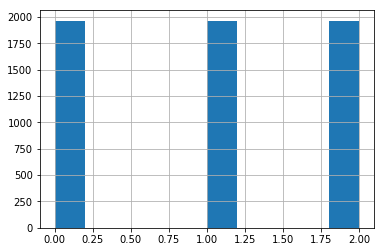

In [21]:
dataset['Purchase_x'].hist()

In [17]:
dataset.head()

,Purchase_x,Occupation,Marital_Status,Gender_F,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1,10,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34,1,16,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
110,1,15,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
139,0,7,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
152,1,20,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [18]:
dataset['Purchase_x'].describe()

count     5891
unique       3
top          2
freq      1964
Name: Purchase_x, dtype: int64

In [19]:
dataset.to_csv(DATA_WRITE_PATH, index=False)